In [1]:
import pandas as pd

# Load the dataset

In [3]:
data = pd.read_csv('StudentPerformanceFactors.csv')

## 1. Clean the Dataset
#### 1.1 Drop rows with missing values (if any)

In [5]:
data.dropna(inplace=True)

#### 1.2 Check for duplicates and remove (if any)

In [7]:
data.drop_duplicates(inplace=True)

# 2. Encode Categorical Features
#### 2.1 Define the ordinal features and their categories

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
}

#### 2.2 Initialize the ordinal encoder

In [11]:
ordinal_encoder = OrdinalEncoder(categories=list(ordinal_features.values()))

#### 2.3 Encode the ordinal features

In [13]:
data[list(ordinal_features.keys())] = ordinal_encoder.fit_transform(data[list(ordinal_features.keys())])

#### 2.4 Define nominal features for one-hot encoding

In [15]:
nominal_features = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']

#### 2.5 One-hot encode the nominal features

In [17]:
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)

# 3. Split the data into training and test sets

In [19]:
from sklearn.model_selection import train_test_split

#### 3.1 Separate the features (X) from the target variable (y)

In [21]:
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']

#### 3.2 Split the data into training and test sets (80% train, 20% test)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print("Training data shape:", X_train.shape)

Training data shape: (5102, 19)


In [25]:
print("Test data shape:", X_test.shape)

Test data shape: (1276, 19)


# 4. Apply two regression algorithms Linear Regression and Random Forest

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### 4.1 Train a Linear Regression Model

In [29]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

##### 4.1.1 Make predictions on the test set

In [31]:
y_pred_lr = lin_reg.predict(X_test)

##### 4.1.2 Evaluate the model performance

In [33]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R² Score: {r2_lr}")

Linear Regression - Mean Squared Error: 4.153009764099105
Linear Regression - R² Score: 0.7327419455105679


#### 4.2 Train a Random Forest Regression Model

In [35]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### 4.2.1 Make predictions on the test set

In [37]:
y_pred_rf = rf_reg.predict(X_test)

##### 4.2.2 Evaluate the model performance

In [39]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")

Random Forest - Mean Squared Error: 5.741480329153605
Random Forest - R² Score: 0.6305193221736141


# 5. Visualizing 

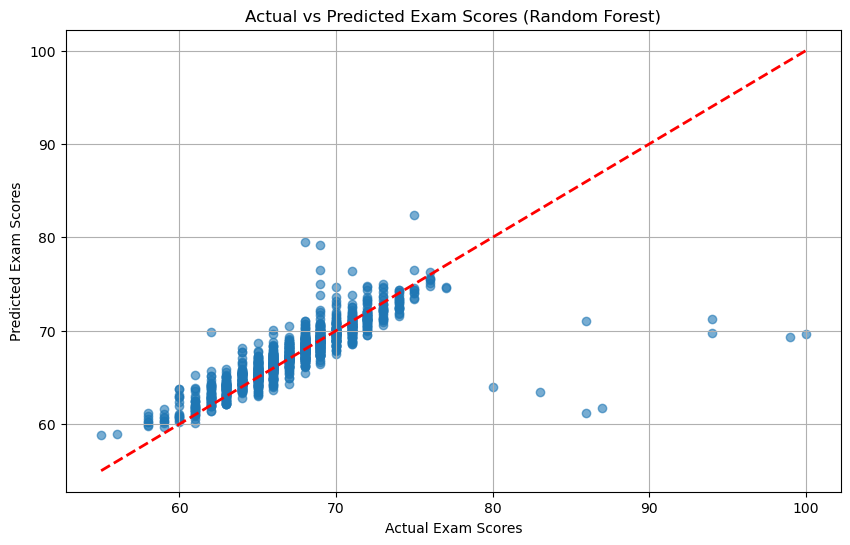

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect prediction
plt.title('Actual vs Predicted Exam Scores (Random Forest)')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid()
plt.show()

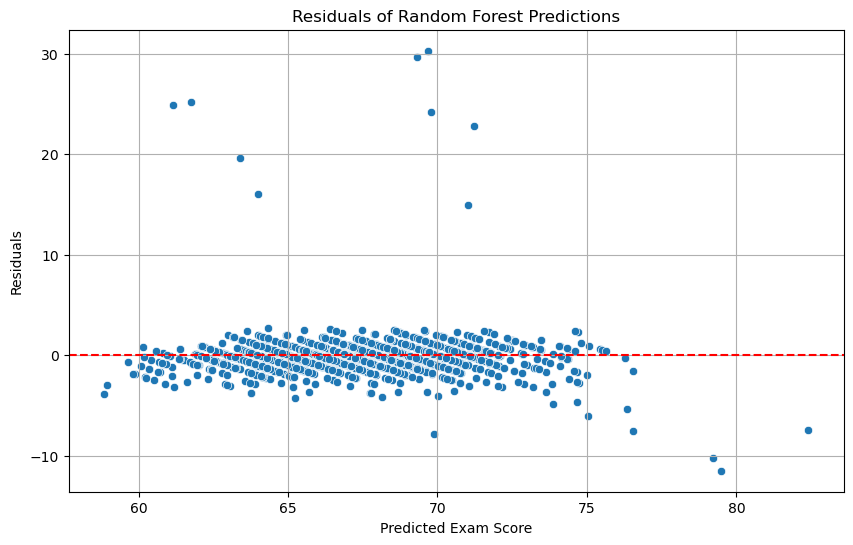

In [42]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residuals of Random Forest Predictions')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals')
plt.grid()
plt.show()

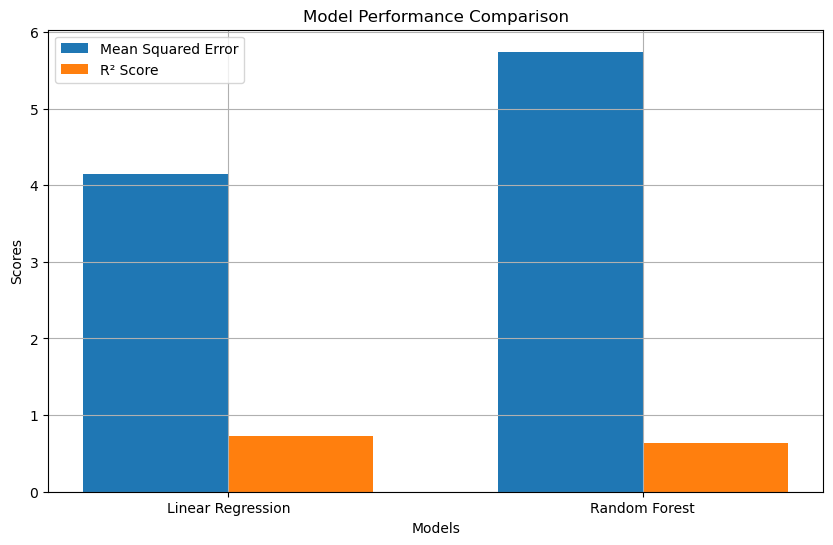

In [43]:
# Data for model performance comparison
model_names = ['Linear Regression', 'Random Forest']
mse_values = [4.15, mse_rf]  # Replace with your actual MSE for Linear Regression
r2_values = [0.73, r2_rf]     # Replace with your actual R² for Linear Regression

# Create a DataFrame for plotting
performance_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'R² Score': r2_values
})

# Set the bar width
bar_width = 0.35
x = np.arange(len(model_names))

# Create the bar plots
plt.figure(figsize=(10, 6))
bar1 = plt.bar(x, performance_df['MSE'], width=bar_width, label='Mean Squared Error')
bar2 = plt.bar(x + bar_width, performance_df['R² Score'], width=bar_width, label='R² Score')

# Adding labels and title
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.xticks(x + bar_width / 2, model_names)
plt.ylabel('Scores')
plt.legend()
plt.grid()
plt.show()

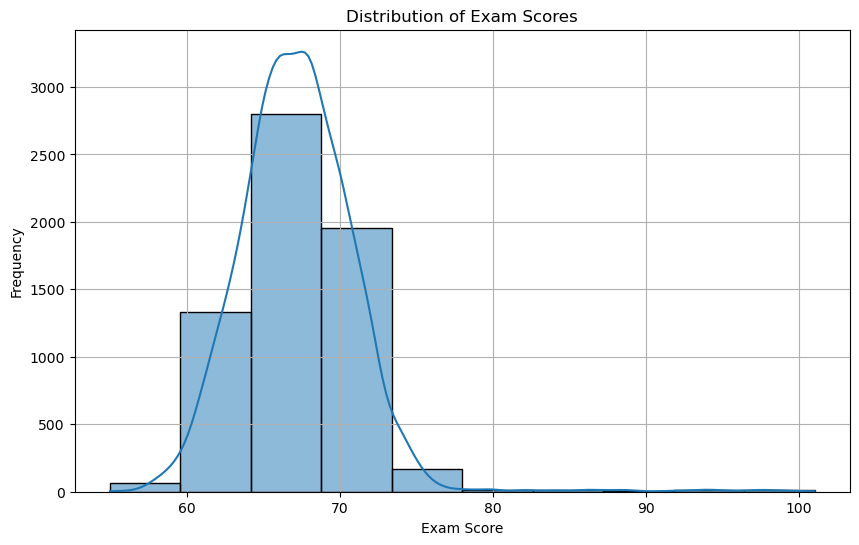

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], bins=10, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

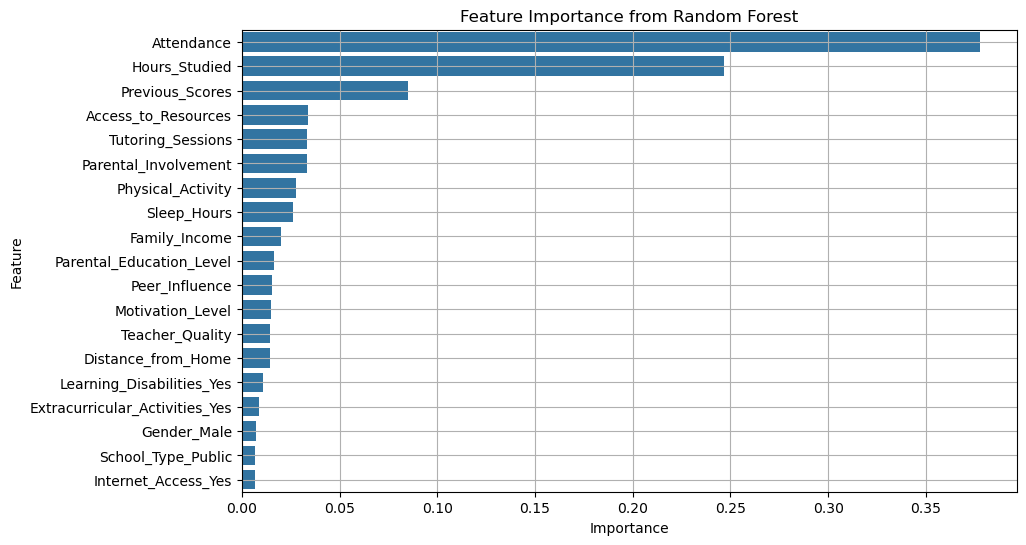

In [45]:
# Calculate feature importances
importances = rf_reg.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()